<a href="https://colab.research.google.com/github/EkCaAv/IBERO/blob/IA-Act-6-Cluster/Actividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import plotly.express as px
import numpy as np
import pandas as pd 
from pandasql import sqldf


In [3]:
from google.colab import drive
#import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
countries = pd.read_csv('/content/gdrive/MyDrive/PY-Diplomado/countries.csv',sep=',')
cities = pd.read_csv('/content/gdrive/MyDrive/PY-Diplomado/cities.csv',sep=',')
states = pd.read_csv('/content/gdrive/MyDrive/PY-Diplomado/states.csv',sep=',')
sunshine = pd.read_csv('/content/gdrive/MyDrive/PY-Diplomado/sunshine hours by city.csv',sep=',')
sunshine.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0


In [5]:
countries.head()

,id,name,iso3,iso2,numeric_code,phone_code,capital,currency,currency_name,currency_symbol,tld,native,region,subregion,timezones,latitude,longitude,emoji,emojiU
0,1,Afghanistan,AFG,AF,4,93,Kabul,AFN,Afghan afghani,؋,.af,افغانستان,Asia,Southern Asia,"[{zoneName:'Asia\/Kabul',gmtOffset:16200,gmtOf...",33.000000,65.0,🇦🇫,U+1F1E6 U+1F1EB
1,2,Aland Islands,ALA,AX,248,+358-18,Mariehamn,EUR,Euro,€,.ax,Åland,Europe,Northern Europe,"[{zoneName:'Europe\/Mariehamn',gmtOffset:7200,...",60.116667,19.9,🇦🇽,U+1F1E6 U+1F1FD
2,3,Albania,ALB,AL,8,355,Tirana,ALL,Albanian lek,Lek,.al,Shqipëria,Europe,Southern Europe,"[{zoneName:'Europe\/Tirane',gmtOffset:3600,gmt...",41.000000,20.0,🇦🇱,U+1F1E6 U+1F1F1
3,4,Algeria,DZA,DZ,12,213,Algiers,DZD,Algerian dinar,دج,.dz,الجزائر,Africa,Northern Africa,"[{zoneName:'Africa\/Algiers',gmtOffset:3600,gm...",28.000000,3.0,🇩🇿,U+1F1E9 U+1F1FF
4,5,American Samoa,ASM,AS,16,+1-684,Pago Pago,USD,US Dollar,$,.as,American Samoa,Oceania,Polynesia,"[{zoneName:'Pacific\/Pago_Pago',gmtOffset:-396...",-14.333333,-170.0,🇦🇸,U+1F1E6 U+1F1F8


In [6]:
cities.head()

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333,Q4805192
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002,Q156558
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421,Q10308323
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800,Q3290334
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346,Q2670909


In [7]:
sunshine.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0


In [13]:
query = """
SELECT 
    countries.region AS Region,
    countries.subregion AS Subregion,
    sunshine.Country,
    countries.iso2 AS ISO2,
    countries.iso3 AS ISO3,
    sunshine.City,
    sunshine.Year,
    sunshine.Jan,
    sunshine.Feb,
    sunshine.Mar,
    sunshine.Apr,
    sunshine.May,
    sunshine.Jun,
    sunshine.Jul,
    sunshine.Aug,
    sunshine.Sep,
    sunshine.Oct,
    sunshine.Nov,
    sunshine.Dec,
    cities.latitude AS Latitude,
    cities.longitude AS Longitude
FROM 
    sunshine
INNER JOIN 
    cities
ON 
    sunshine.City = cities.name
AND 
    sunshine.Country = cities.country_name
INNER JOIN 
    countries
ON 
    sunshine.Country = countries.name
"""
data = sqldf(query)
data = data.melt(id_vars=["Region","Subregion","Country","ISO2","ISO3","City","Year","Latitude","Longitude"], 
        var_name="Month", 
        value_name="Value")
data.head()

,Region,Subregion,Country,ISO2,ISO3,City,Year,Latitude,Longitude,Month,Value
0,Asia,Southern Asia,Afghanistan,AF,AFG,Kabul,3175.1,34.52813,69.17233,Jan,177.2
1,Europe,Southern Europe,Albania,AL,ALB,Tirana,2544.0,41.32750,19.81889,Jan,124.0
2,Africa,Northern Africa,Algeria,DZ,DZA,Algiers,2847.0,36.73225,3.08746,Jan,149.0
3,Africa,Northern Africa,Algeria,DZ,DZA,Tamanrasset,3686.0,22.78500,5.52278,Jan,297.6
4,Africa,Middle Africa,Angola,AO,AGO,Luanda,2341.0,-8.83682,13.23432,Jan,219.0


In [14]:
fig = px.scatter_geo(data, lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'World',
        showlegend = True,
        geo = dict(
            scope = 'world',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [15]:
fig = px.scatter_geo(data.query("Region=='Europe'"), lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'Europe',
        showlegend = True,
        geo = dict(
            scope = 'europe',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [16]:
fig = px.scatter_geo(data.query("Region=='Africa'"), lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'Africa',
        showlegend = True,
        geo = dict(
            scope = 'africa',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [17]:
fig = px.scatter_geo(data.query("Subregion=='Northern America'"), lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'Northern America',
        showlegend = True,
        geo = dict(
            scope = 'north america',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [18]:
fig = px.scatter_geo(data.query("Subregion=='South America'"), lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'South America',
        showlegend = True,
        geo = dict(
            scope = 'south america',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [19]:
fig = px.scatter_geo(data.query("Region=='Asia'"), lat="Latitude", lon="Longitude", color="Value",
                     hover_name="City", size="Year",
                     animation_frame="Month",color_continuous_scale=px.colors.sequential.Cividis,
                     projection="natural earth",height=700, width=1000)
fig.update_layout(
        title_text = 'Asia',
        showlegend = True,
        geo = dict(
            scope = 'asia',
            landcolor = '#0A6007',
        )
    )
fig.update_geos(
    visible=True,
    resolution=50,
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue",
    showocean = True,oceancolor="#2695A0",
)
fig.show()

In [20]:
cluster_data = sunshine.iloc[:,1:].set_index("City")
cluster_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
City,,,,,,,,,,,,,
Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0


In [21]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
X = scale(cluster_data.values)

In [23]:
distortions = []
K = range(1,12)

for cluster_size in K:
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++')
    kmeans = kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
df = pd.DataFrame({'Clusters': K, 'Distortions': distortions})
fig = (px.line(df, x='Clusters', y='Distortions', template='seaborn',height=700, width=1000)).update_traces(mode='lines+markers')
fig.show()

In [24]:
K = 4
cluster = KMeans(K)
cluster.fit(X)
cluster_data["Cluster"] = ["Cluster{}".format(x) for x in cluster.predict(X)]

pca = PCA(2)
Xpca = pca.fit_transform(cluster_data.iloc[:,:-1])
pca_df = pd.DataFrame(Xpca, columns=["PCA1","PCA2"])
pca_df["Cluster"] = cluster_data["Cluster"].values

fig = px.scatter(pca_df, x="PCA1", y="PCA2", color="Cluster",height=700, width=1000)
fig.show()

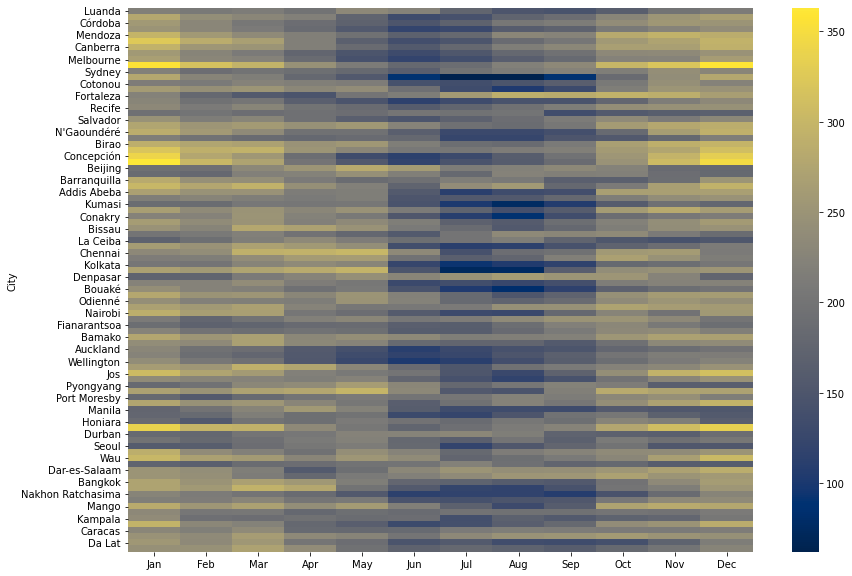

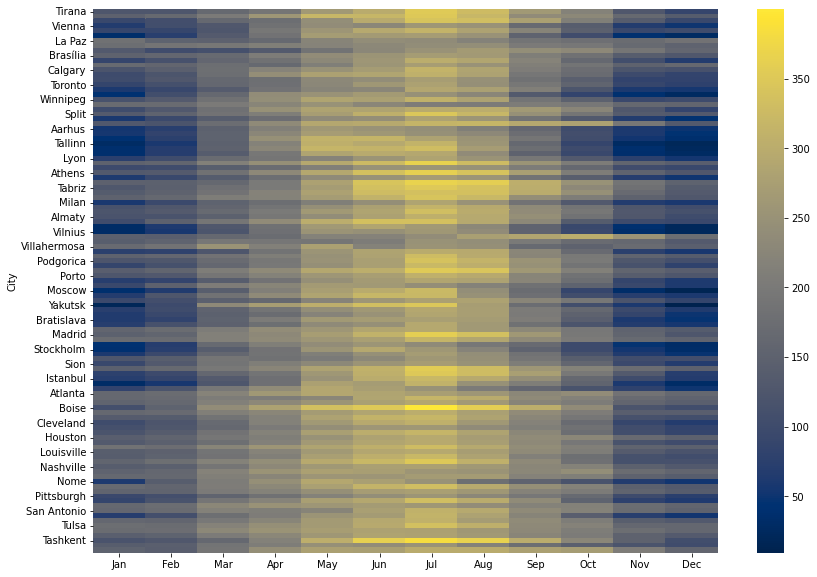

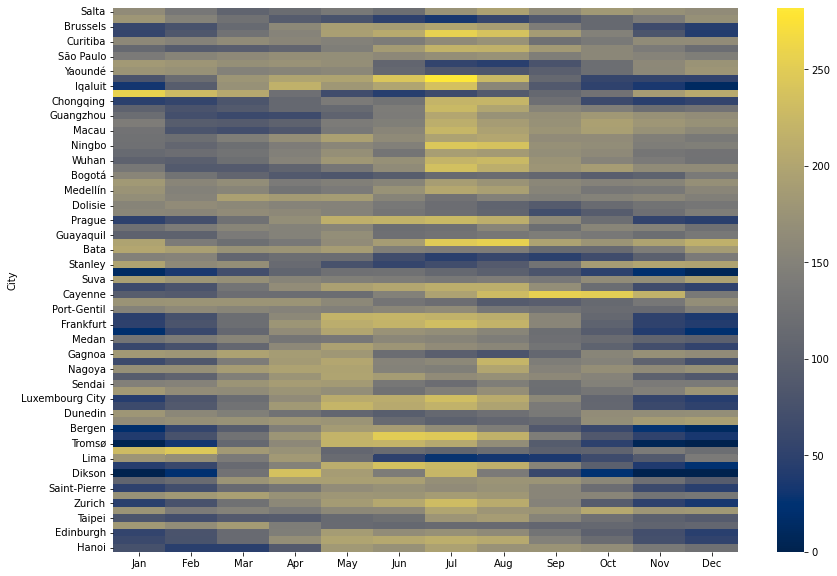

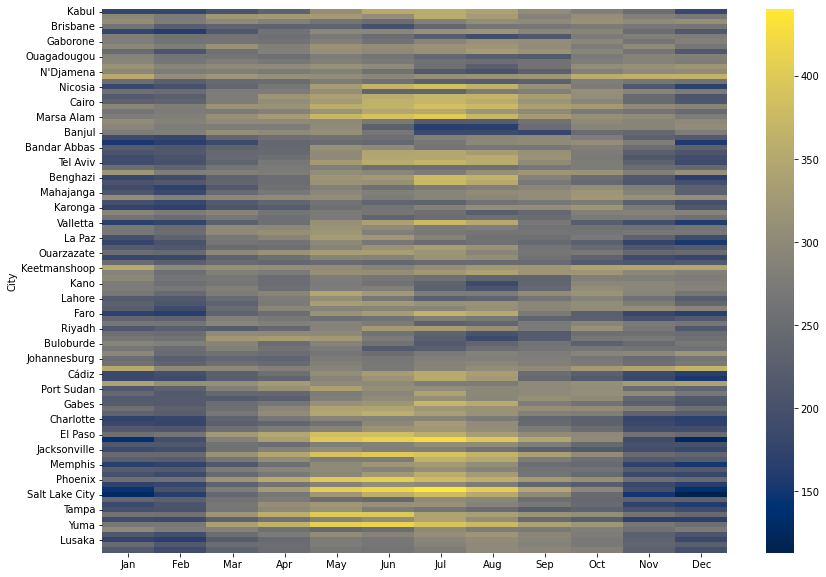

In [25]:
for k in range(K):
    plt.figure(figsize=(14,10))
    sns.heatmap(cluster_data[cluster_data["Cluster"]=="Cluster{}".format(k)].iloc[:,0:12],cmap="cividis")
    plt.show()